In [36]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile
import numpy as np
import os
import multiprocessing
import sounddevice as sd
import msvcrt

data_source = '../data/'

# Giới Thiệu
Let load a audio file

In [2]:
audio_file = data_source + "C4.wav"
samples, sample_rate = librosa.load(audio_file, sr=None)
print('sample: ', samples, samples.shape)
print('sample_rate: ', sample_rate)

sample:  [ 0.          0.00626483  0.01250505 ... -0.01869614 -0.01250505
 -0.00626483] (132300,)
sample_rate:  44100


## Sample và Sample Rate

### 1. **Sample (Mẫu)**
- **Sample** là một điểm dữ liệu số hóa đại diện cho biên độ của tín hiệu âm thanh (sóng âm) tại một thời điểm nhất định.
- Quá trình số hóa âm thanh từ tín hiệu analog sang tín hiệu digital gọi là **sampling** (lấy mẫu).

### 2. **Sample Rate (Tần số lấy mẫu)**
- **Sample Rate** (tần số lấy mẫu) là số lượng mẫu âm thanh được thu thập mỗi giây trong quá trình số hóa âm thanh.
- Đơn vị: **Hz (Hertz)** hoặc **kHz (Kilohertz)**, tức là số mẫu trên giây.

Ví dụ: Sample Rate 44.1 kHz (44,100 Hz) nghĩa là 44,100 mẫu âm thanh được thu thập mỗi giây.

### 3. **Ý Nghĩa Của Sample Rate**
- Sample Rate càng cao, âm thanh càng chính xác và chi tiết, kích thước file âm thanh sẽ lớn hơn.
- Một Sample Rate thấp gây ra hiện tượng **aliasing** (hiệu ứng nhiễu tần số).

#### Các Sample Rate phổ biến:
- **44.1 kHz**: Tiêu chuẩn cho âm thanh CD và phần lớn các định dạng âm thanh tiêu dùng. Nó đủ cao để ghi lại tất cả các tần số âm thanh mà tai người có thể nghe được.
- **48 kHz**: Thường được sử dụng trong sản xuất video và phát sóng chuyên nghiệp.
- **96 kHz hoặc 192 kHz**: Được sử dụng trong các ứng dụng âm thanh chất lượng cao và sản xuất nhạc chuyên nghiệp.

### 4. **Liên Hệ Giữa Sample Rate và Chất Lượng Âm Thanh**
- Theo định lý Nyquist, để tái tạo lại âm thanh chính xác, Sample Rate phải ít nhất gấp đôi tần số cao nhất trong âm thanh cần ghi. Vì tai người nghe được tần số từ khoảng 20 Hz đến 20,000 Hz, nên Sample Rate tối thiểu cần thiết là khoảng 40,000 Hz. Đây là lý do tại sao 44.1 kHz (44,100 Hz) được chọn làm tiêu chuẩn cho âm thanh CD.

### Tóm lại:
- **Sample** là một điểm dữ liệu của tín hiệu âm thanh số hóa tại một thời điểm cụ thể.
- **Sample Rate** là số lượng mẫu âm thanh được thu thập mỗi giây, quyết định độ chính xác và kích thước của file âm thanh số.

## Waveform
Quan sát waveform và nghe âm thanh

In [52]:
def view_waveform(samples, sample_rate=44100, split=150):
    plt.figure(figsize=[7,2.5])
    plt.grid()
    librosa.display.waveshow(samples[:int(sample_rate/split)], sr=sample_rate)

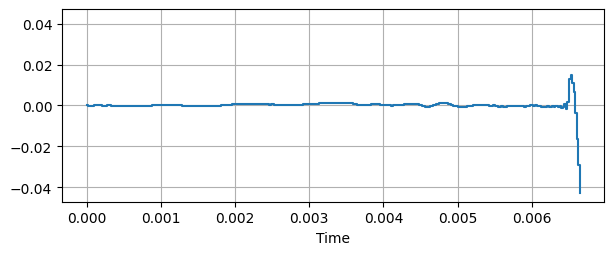

In [39]:
def hear_view_waveform(samples):
    view_waveform(samples)
    sd.play(samples, sample_rate) # play the audio directly

hear_view_waveform(samples)

- File audio trên có waveform dạng hình sin.
- Waveform là tổng hợp tất cả giá trị samples theo thời gian. 

### Lý thuyết Waveform

Biểu đồ sóng âm thanh (hay **waveform**) là một cách trực quan để biểu diễn âm thanh theo thời gian. Thông qua biểu đồ này, có thể nhận diện các đặc điểm chính của âm thanh, chẳng hạn như biên độ, tần số, pha, và dạng sóng.

#### 0. **Dạng sóng (Waveform Shape)**
- **Dạng sóng** mô tả hình dạng tổng thể của sóng âm thanh và nó quyết định âm sắc của âm thanh.
  - **Sóng sine**: Sóng mịn và tuần hoàn, thường tạo ra âm thanh thuần khiết, như tiếng bíp của máy đo nhịp.
  - **Sóng vuông**: Dạng sóng có các cạnh sắc nét, thường tạo ra âm thanh điện tử hoặc nhạc cụ số.
  - **Sóng răng cưa**: Dạng sóng nghiêng dần, thường được sử dụng trong các âm thanh synthesize.
  - **Sóng tam giác**: Dạng sóng có dạng hình tam giác, thường tạo ra âm thanh có độ mềm hơn sóng vuông.

VD: tạo 1 sóng hình sin.

In [4]:
sample_rate = 44100 # in Hz
duration = 2 # in second(s)
num_sample = int(sample_rate * duration)

In [5]:
# Tìm hiểu ý nghĩa của amplitude và frequency bên dưới
def create_sin_waveform(amplitude = 0.5, frequency = 440): # 440 Hz sine wave
    t = np.linspace(0, duration, num_sample, endpoint=False)
    return np.float32(amplitude * np.sin(2 * np.pi * frequency * t)) # Convert to 32-bit PCM format

samples = create_sin_waveform()

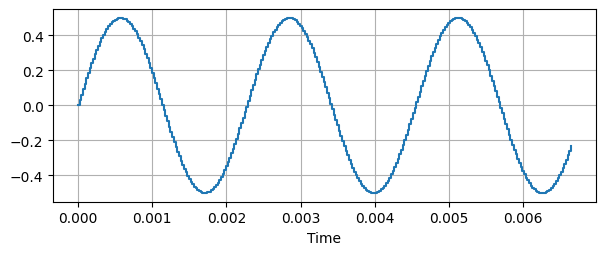

In [6]:
hear_view_waveform(samples)

#### 1. **Biên độ (Amplitude)**
- **Biểu diễn trên trục y**: Nó thể hiện độ mạnh yếu của sóng âm thanh.
- **Ý nghĩa**: Biên độ càng cao, âm thanh càng lớn. Biên độ nhỏ cho thấy âm thanh yếu hơn.
  - Ví dụ: Một đoạn âm thanh to sẽ có biên độ lớn với các đỉnh và đáy rõ ràng.

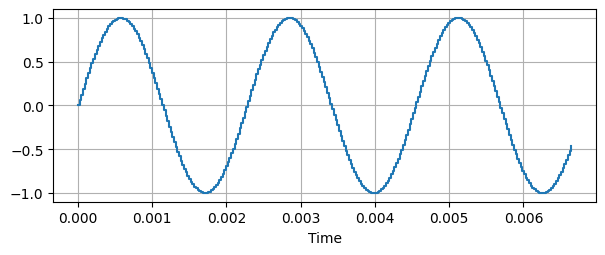

In [7]:
high_amp_samples = create_sin_waveform(amplitude=1)
hear_view_waveform(high_amp_samples)

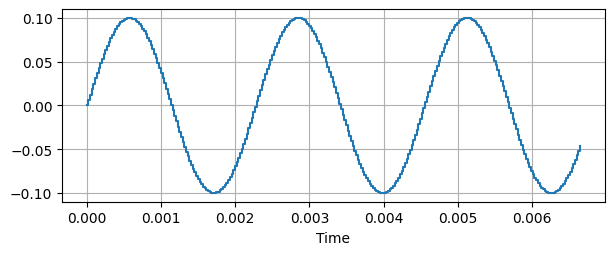

In [8]:
low_amp_samples = create_sin_waveform(amplitude=0.1)
hear_view_waveform(low_amp_samples)

- Tạo âm thanh nhỏ dần bằng cách cho amplitude giảm dần theo samples.

In [9]:
amplitude = np.linspace(1, 0, num_sample, endpoint=False)
t = np.linspace(0, duration, num_sample, endpoint=False)
decrease_amp_samples = np.float32(amplitude * np.sin(2 * np.pi * 440 * t)) # Convert to 32-bit PCM format

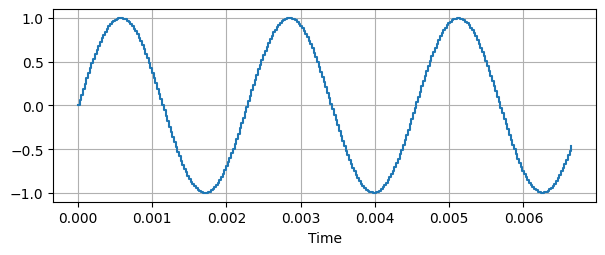

In [10]:
hear_view_waveform(decrease_amp_samples)

#### 2. **Tần số (Frequency)**
- **Biểu diễn trên trục x (theo thời gian)**: Tần số liên quan đến khoảng cách giữa các đỉnh hoặc đáy của sóng âm theo trục hoành (trục x), tương ứng với thời gian.
- **Ý nghĩa**: 
  - Tần số cao tương ứng với các đỉnh sóng gần nhau, tạo ra âm thanh cao.
  - Tần số thấp tương ứng với các đỉnh sóng cách xa nhau hơn, tạo ra âm thanh trầm.
  - Ví dụ: Âm thanh của một chiếc sáo sẽ có các đỉnh sóng gần nhau, trong khi tiếng trống sẽ có các đỉnh sóng xa nhau.

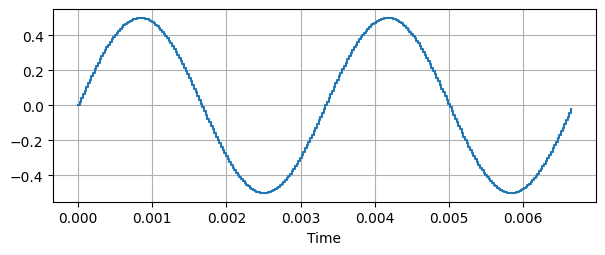

In [11]:
low_freq_samples = create_sin_waveform(frequency=300)
hear_view_waveform(low_freq_samples)

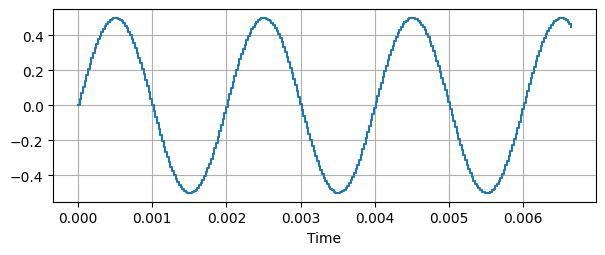

In [12]:
high_freq_samples = create_sin_waveform(frequency=500)
hear_view_waveform(high_freq_samples)

- Tạo âm thanh trầm dần bằng cách cho frequency giảm dần theo samples.

In [13]:
frequency = np.linspace(500, 300, num_sample, endpoint=False)
t = np.linspace(0, duration, num_sample, endpoint=False)
decrease_freq_samples = np.float32(0.1 * np.sin(2 * np.pi * frequency * t)) # Convert to 32-bit PCM format

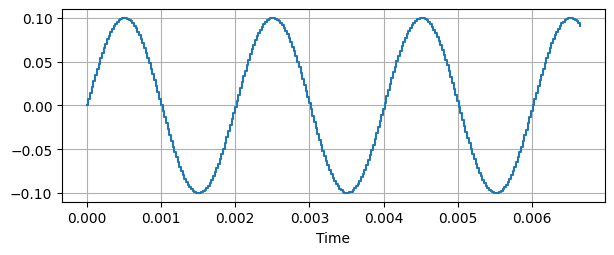

In [14]:
hear_view_waveform(decrease_freq_samples)

#### 3. **Pha (Phase)**
- **Pha của sóng âm**: Độ lệch pha của các sóng có thể không dễ dàng nhận ra bằng mắt thường từ biểu đồ, nhưng khi hai sóng âm có cùng tần số nhưng khác pha, chúng có thể cộng hưởng hoặc triệt tiêu lẫn nhau.
- **Hiện tượng nhiễu pha**: Nếu hai sóng có pha khác nhau giao thoa, chúng có thể gây ra hiện tượng cộng hưởng (làm âm thanh mạnh hơn) hoặc triệt tiêu (làm giảm âm thanh).

In [15]:
t1 = np.linspace(0, duration, num_sample, endpoint=False)
phase1_samples = np.float32(0.5 * np.sin(2 * np.pi * 440 * t1)) # Convert to 32-bit PCM format

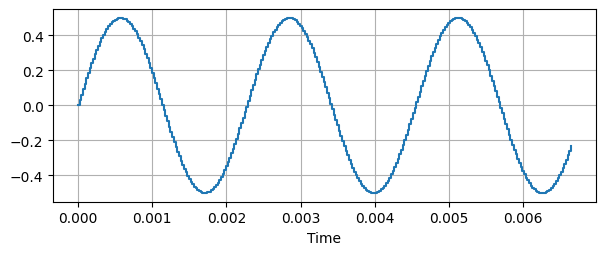

In [16]:
hear_view_waveform(phase1_samples)

- 2 sóng cùng frequency nhưng ngược phase

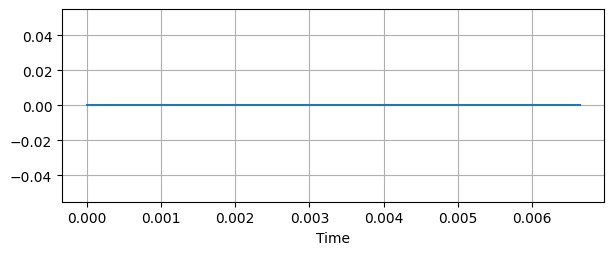

In [17]:
hear_view_waveform(phase1_samples + (-phase1_samples))

- 2 sóng cùng frequency và cùng phase

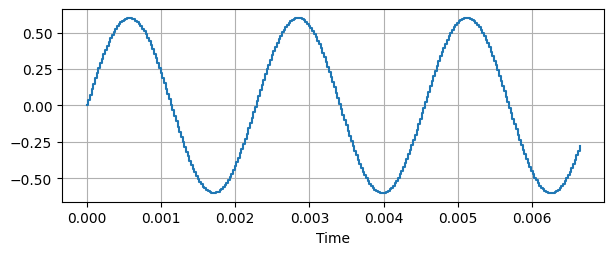

In [18]:
hear_view_waveform(phase1_samples + 0.2 * phase1_samples)

- Giao với một waveform ngẫu nhiên, 2 âm thanh được phát độc lập

In [19]:
t2 = np.linspace(5, duration, num_sample, endpoint=False)
phase2_samples = np.float32(0.5 * np.sin(2 * np.pi * 440 * t2)) # Convert to 32-bit PCM format

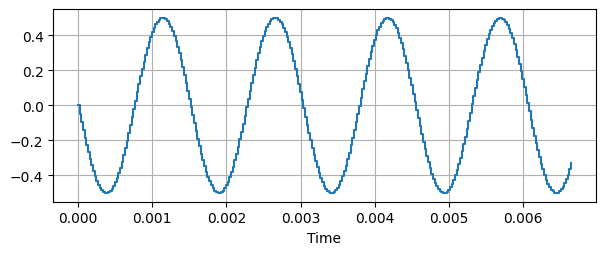

In [20]:
hear_view_waveform(phase2_samples)

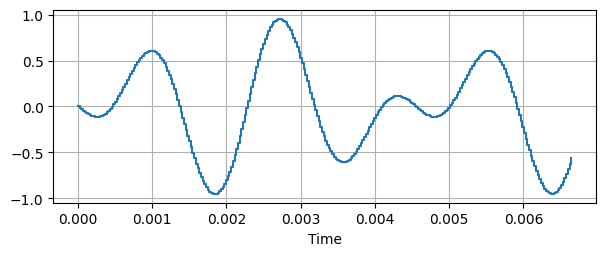

In [21]:
hear_view_waveform(phase1_samples + phase2_samples)

In [22]:
t3 = np.linspace(5, duration, num_sample, endpoint=False)
phase3_samples = np.float32(1 * np.sin(2 * np.pi * 300 * t3)) # Convert to 32-bit PCM format

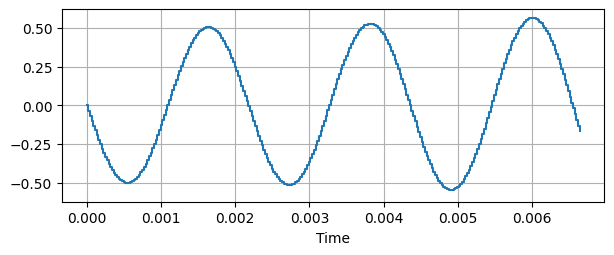

In [23]:
hear_view_waveform(phase1_samples + phase3_samples)

#### 5. **Envelope (Bao bì âm thanh)**
- **Envelope** là cách mà biên độ của âm thanh thay đổi theo thời gian. Envelope có thể được chia thành 4 phần chính:
  - **Attack**: Phần đầu của âm thanh, nơi biên độ tăng nhanh.
  - **Decay**: Phần biên độ giảm sau khi đạt đỉnh cao.
  - **Sustain**: Phần mà biên độ được duy trì trong một khoảng thời gian.
  - **Release**: Phần âm thanh kết thúc, khi biên độ giảm dần về 0.
  
  - Ví dụ: Tiếng piano có phần Attack ngắn (âm thanh xuất hiện nhanh), trong khi tiếng violin có phần Attack dài hơn (âm thanh xuất hiện từ từ).

#### 6. **Độ vang (Reverb)**
- **Độ vang** có thể được nhận ra thông qua sự kéo dài của sóng âm sau khi âm thanh chính kết thúc. Nếu có nhiều dao động nhỏ sau sóng chính, đó là dấu hiệu của hiệu ứng reverb.

#### 7. **Sự biến đổi trong thời gian (Temporal Variation)**
- **Sự biến đổi** của biên độ và tần số trong thời gian cũng có thể được nhận thấy trên biểu đồ sóng. Điều này cho thấy cách âm thanh thay đổi về độ lớn, cao độ, và hình dạng theo thời gian.
  - Ví dụ: Một đoạn nhạc có thể có các phần âm lượng thay đổi, với các đoạn cao trào và đoạn nhẹ nhàng.

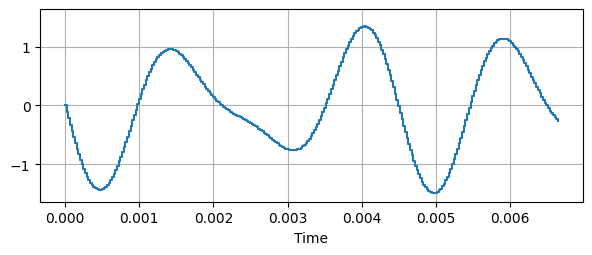

In [24]:
hear_view_waveform(phase3_samples + phase2_samples)

#### Tóm lại, để nhận diện các đặc điểm của âm thanh từ biểu đồ sóng âm thanh, cần xét các yếu tố sau:
- **Biên độ**: Độ lớn của âm thanh.
- **Tần số**: Cao độ của âm thanh.
- **Pha**: Vị trí của sóng trong chu kỳ dao động.
- **Dạng sóng**: Hình dạng của sóng ảnh hưởng đến âm sắc.
- **Envelope**: Cách âm thanh phát triển theo thời gian.
- **Reverb**: Hiệu ứng độ vang.

### Giọng đọc thực tế

#### Chuyển file âm thanh từ .mp3 sang .wave

In [25]:
audio_file = data_source + "TEST 01."
# audio = AudioSegment.from_mp3(audio_file + "mp3")
# audio.export("TEST 01.wav", format="wav")

sample:  [ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -7.6293945e-04
 -9.1552734e-04 -6.1035156e-04] (16387200,)
sample_rate:  48000


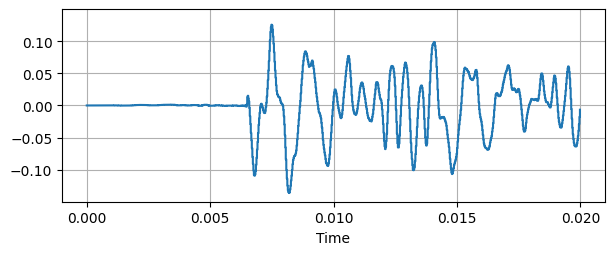

In [26]:
samples, sample_rate = librosa.load(audio_file + 'wav', sr=None)
print('samples: ', samples, samples.shape)
print('sample_rate: ', sample_rate)

view_waveform(samples, sample_rate, 50)

#### Đổi pitch (cao độ) của âm thanh
- Giọng bổng

In [27]:
sd.play(samples[0:int(sample_rate*10)], sample_rate*2)

- Giọng trầm

In [28]:
sd.play(samples[0:int(sample_rate*10)], sample_rate/2)

- Đổi pitch (cao độ) của âm thanh mà không đổi tốc độ phát.

In [29]:
samples_shifted = librosa.effects.pitch_shift(samples, sr=sample_rate, n_steps=3) # tăng cao độ lên 3 lần
sd.play(samples_shifted[0:int(sample_rate*10)], sample_rate)

#### Lưu file âm thanh

In [30]:
def save_audio(path, samples):
    if os.path.exists(path):
        os.remove(path)
    wavfile.write(path, int(sample_rate), np.float32(samples))

save_audio('high_voice.wav',samples_shifted)

# Âm nhạc cơ bản

- Hai note nhạc liền kề nhau có khoảng cách là bán âm (nửa cung) và chêch lệch tần số tương ứng là $2^{\frac{1}{12}}$ là: 
$f_{n+1} = f_n \times 2^{\frac{1}{12}}$
    - VD: note C0 (Đô quãng 0) có tần số là 16.35 thì tần số của note C#0 (Đô thăng quãng 0) sẽ là $16.35 \times 2^{\frac{1}{12}}$
- Dict chứa các note nhạc là tần số (frequency) tương ứng.


In [31]:
note_frequencies = np.load(data_source+'note_frequencies.npy', allow_pickle=True).item()
print(note_frequencies)

{'C0': 16.35, 'C#0': 17.32, 'Db0': 17.32, 'D0': 18.35, 'D#0': 19.45, 'Eb0': 19.45, 'E0': 20.6, 'F0': 21.83, 'F#0': 23.12, 'Gb0': 23.12, 'G0': 24.5, 'G#0': 25.96, 'Ab0': 25.96, 'A0': 27.5, 'A#0': 29.14, 'Bb0': 29.14, 'B0': 30.87, 'C1': 32.7, 'C#1': 34.65, 'Db1': 34.65, 'D1': 36.71, 'D#1': 38.89, 'Eb1': 38.89, 'E1': 41.2, 'F1': 43.65, 'F#1': 46.25, 'Gb1': 46.25, 'G1': 49.0, 'G#1': 51.91, 'Ab1': 51.91, 'A1': 55.0, 'A#1': 58.27, 'Bb1': 58.27, 'B1': 61.74, 'C2': 65.41, 'C#2': 69.3, 'Db2': 69.3, 'D2': 73.42, 'D#2': 77.78, 'Eb2': 77.78, 'E2': 82.41, 'F2': 87.31, 'F#2': 92.5, 'Gb2': 92.5, 'G2': 98.0, 'G#2': 103.83, 'Ab2': 103.83, 'A2': 110.0, 'A#2': 116.54, 'Bb2': 116.54, 'B2': 123.47, 'C3': 130.81, 'C#3': 138.59, 'Db3': 138.59, 'D3': 146.83, 'D#3': 155.56, 'Eb3': 155.56, 'E3': 164.81, 'F3': 174.61, 'F#3': 185.0, 'Gb3': 185.0, 'G3': 196.0, 'G#3': 207.65, 'Ab3': 207.65, 'A3': 220.0, 'A#3': 233.08, 'Bb3': 233.08, 'B3': 246.94, 'C4': 261.63, 'C#4': 277.18, 'Db4': 277.18, 'D4': 293.66, 'D#4': 311.

- Tạo waveform theo tên note nhạc.

In [32]:
def create_note(note_name, duration): # Duration in seconds
    num_sample = int(sample_rate * duration)
    amplitude = np.linspace(1, 0, num_sample, endpoint=False)
    frequency = note_frequencies[note_name]
    t = np.linspace(0, duration, num_sample, endpoint=False)
    return np.float32(amplitude * np.sin(2 * np.pi * frequency * t))  # 440 Hz sine wave, # Convert to 16-bit PCM format

sd.play(create_note('C4',5), sample_rate)

- Tạo bài hát từ các note nhạc.

In [33]:
def create_song(notes):
    song = np.array([])
    for note in notes:
        song = np.concatenate([song, create_note(note[0], note[1])])
        song = np.concatenate([song, np.zeros(int(sample_rate * 0.1))])
    
    return np.float32(song)

flattened_notes = [
    ('G4', 0.5), ('G4', 0.5), ('A4', 0.75), ('G4', 0.5), ('C5', 0.5), ('B4', 0.75),
    ('G4', 0.5), ('G4', 0.5), ('A4', 0.75), ('G4', 0.5), ('D5', 0.5), ('C5', 0.75),
    ('G4', 0.5), ('G4', 0.5), ('E5', 0.75), ('C5', 0.5), ('B4', 0.5), ('A4', 0.75),
    ('F5', 0.5), ('F5', 0.5), ('E5', 0.75), ('C5', 0.5), ('D5', 0.75), ('C5', 1)
]
sd.play(create_song(flattened_notes), sample_rate)

- Chạy ứng dụng giả lập piano bằng cách chạy file `piano_app/main.py`. Trên 1 quãng nhạc (interal):
    - Các phím A, S, ..., H, J tương ứng với các phim đàn trắng.
    - Các phím W, E, T, Y, U tương ứng với các phim đàn đen.
    - Đổi quãng nhạc từ 0 -> 8 bằng các phím số.
    - Các note nhạc được phát từ lúc đè phím cho đến khi phím được thả.
    - Có thể chơi nhiều note nhạc cùng lúc.

# Fourier Transform

- Nếu audio là 1 stereo file thì có thể có nhiều chiều chanels (nhiều mảng samples). e.g. left channel.

[  0.  -1.  -1. ... -25. -30. -20.] 48000


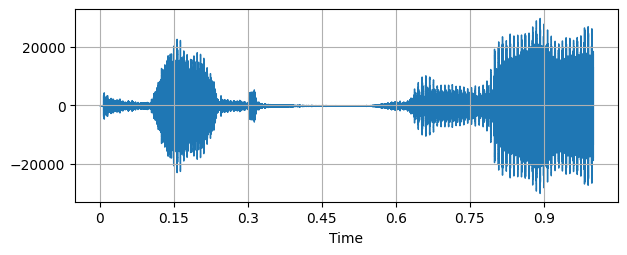

In [62]:
audio_file = data_source + "TEST 01."
sample_rate, samples = wavfile.read(audio_file + 'wav')
print(samples.astype(float), sample_rate)
view_waveform(samples.astype(float), sample_rate, 1)

In [58]:
N = len(samples)
T = 1.0 / sample_rate # Time a sample lasts
frequencies = np.fft.fftfreq(N, T)
fft_values = np.fft.fft(samples)
print(frequencies)
print(fft_values)

[ 0.          0.00292912  0.00585823 ... -0.00878735 -0.00585823
 -0.00292912]
[-1663636.             +0.j          1005850.4147673 -104014.00245791j
   474282.06082414-670956.12320113j ...   -93809.50470707 -33581.71682584j
   474282.06082413+670956.12320113j  1005850.4147673 +104014.00245791j]


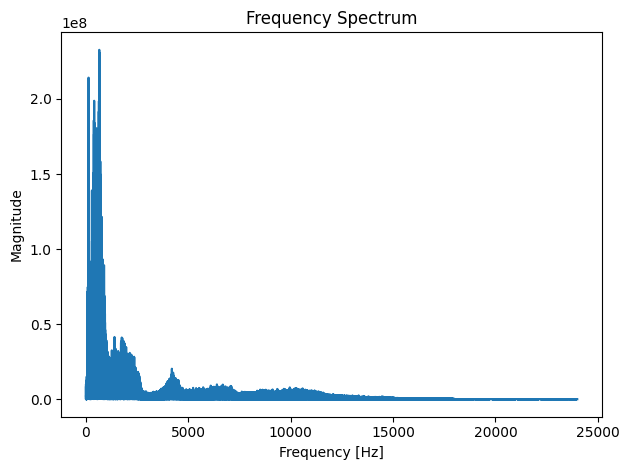

In [61]:
# Step 5: Plot the frequency spectrum (magnitude of the Fourier Transform)
plt.plot(frequencies[:N // 2], np.abs(fft_values[:N // 2]))  # Only plot the positive frequencies, the negative frequencies is asymmetrical to the positive one.
plt.title('Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()